In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [55]:
boston=load_boston()

In [56]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [57]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [58]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)

In [59]:
print(features)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [60]:
print(features.CHAS)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


In [61]:
target=pd.DataFrame(boston.target,columns=['targets'])

In [62]:
print(target)

     targets
0       24.0
1       21.6
2       34.7
3       33.4
4       36.2
..       ...
501     22.4
502     20.6
503     23.9
504     22.0
505     11.9

[506 rows x 1 columns]


In [63]:
print(max(target['targets']))

50.0


In [64]:
print(min(target['targets']))

5.0


In [65]:
df=pd.concat([features,target],axis=1)

In [66]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  targets  
0       15.3  396.90   4.98     24.0  
1       17.8  396.90 

In [67]:
print(df.describe().round(decimals=2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT  targets  
count  506.00   506.00  506.00  506.00   506.00  
mean   408.24    18.46  356.67   12.65    22.53  
std    168.54     2.16   91.29    7.14     9.20  
min    187.00    12.60    0.32    1.73     5.00  
25%    279.00    17.

In [68]:
corr=df.corr('pearson')

In [69]:
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [70]:
print(list(features))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [71]:
corrs=[abs(corr[attr]['targets']) for attr in list(features)]

In [72]:
print(corrs)

[0.3883046085868114, 0.3604453424505447, 0.483725160028373, 0.1752601771902975, 0.4273207723732817, 0.6953599470715389, 0.3769545650045959, 0.24992873408590394, 0.3816262306397776, 0.46853593356776646, 0.507786685537561, 0.33346081965706653, 0.7376627261740143]


In [73]:
l=list(zip(corrs,list(features)))

In [74]:
print(l)

[(0.3883046085868114, 'CRIM'), (0.3604453424505447, 'ZN'), (0.483725160028373, 'INDUS'), (0.1752601771902975, 'CHAS'), (0.4273207723732817, 'NOX'), (0.6953599470715389, 'RM'), (0.3769545650045959, 'AGE'), (0.24992873408590394, 'DIS'), (0.3816262306397776, 'RAD'), (0.46853593356776646, 'TAX'), (0.507786685537561, 'PTRATIO'), (0.33346081965706653, 'B'), (0.7376627261740143, 'LSTAT')]


In [75]:
h=lambda x: x[0]

In [76]:
l.sort(key=h,reverse=True)

In [77]:
print(l)

[(0.7376627261740143, 'LSTAT'), (0.6953599470715389, 'RM'), (0.507786685537561, 'PTRATIO'), (0.483725160028373, 'INDUS'), (0.46853593356776646, 'TAX'), (0.4273207723732817, 'NOX'), (0.3883046085868114, 'CRIM'), (0.3816262306397776, 'RAD'), (0.3769545650045959, 'AGE'), (0.3604453424505447, 'ZN'), (0.33346081965706653, 'B'), (0.24992873408590394, 'DIS'), (0.1752601771902975, 'CHAS')]


In [78]:
corrs,labels=zip((*l))

In [79]:
index=np.arange(len(labels))

In [80]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

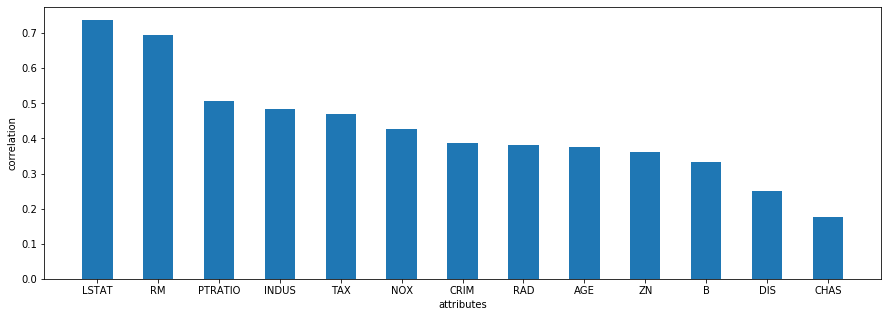

In [81]:
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation')
plt.xticks(index,labels)
plt.show()

# normalization on data

In [82]:
X=df["LSTAT"].values
Y=df["targets"].values
X

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [83]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

In [84]:
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [85]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [86]:
print(X[:5])

[0.08967991 0.2044702  0.06346578 0.03338852 0.09933775]


In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

# gradient function

In [88]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

In [89]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m * x + c) - t) ** 2)
    return e * (1/(2 * N))

In [90]:
def gradient_decent(init_m,init_c,x,t,learning_rate,iteration,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iteration):
        e = error(m,x,c,t)
        if e < error_threshold:
            print("error less than threshold error")
            break
        else:    
            error_values.append(e)
            m,c = update(m,x,c,t,learning_rate)
            mc_values.append((m,c))
    return m,c,error_values,mc_values    

In [91]:
%%time
init_m= 0.9
init_c = 0
learning_rate = 0.001
iteration = 250
error_threshold = 0.001
m,c,error_values,mc_values = gradient_decent(init_m,init_c,xtrain,ytrain,learning_rate,iteration,error_threshold)

Wall time: 51.9 ms


In [92]:
m

-0.7759652697177881

In [107]:
c

0.6262086442056463

# visualization

In [108]:
mc_values_anim=mc_values[0:250:5]

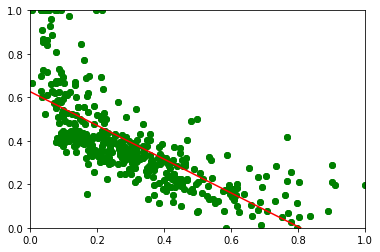

In [109]:
fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtrain,ytrain,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,


def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m *(-0.5) + c
    x2,y2=1.5,m * 1.5 + c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim=FuncAnimation(fig, update_frame, frames=np.arange(len(mc_values_anim)), init_func=init, blit=True)
HTML(anim.to_html5_video())

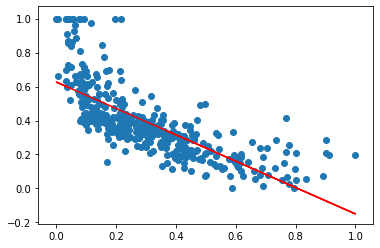

In [110]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,(m*xtrain+c),color='r')

Text(0, 0.5, 'error values')

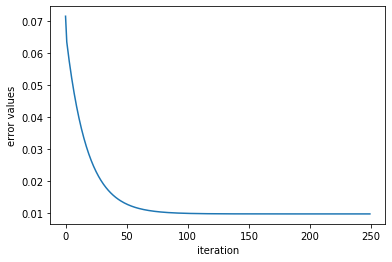

In [111]:
plt.plot(np.arange(len(error_values)),error_values)
plt.xlabel('iteration')
plt.ylabel('error values')

In [112]:
predicted=(m*xtest)+c

In [113]:
mean_squared_error(ytest,predicted)

0.017401153789491603

In [114]:
pr=pd.DataFrame(zip(xtest,ytest,predicted),columns=['xtest','ytest','predicted'])

In [115]:
pr.head()

,xtest,ytest,predicted
0,0.083057,0.533333,0.561759
1,0.020419,0.815556,0.610364
2,0.320640,0.335556,0.377403
3,0.127759,0.402222,0.527072
4,0.402042,0.235556,0.314238


In [116]:
x_new=xtest.reshape(-1,1)

In [117]:
y_new=ytest.reshape(-1,1)

In [118]:
predicted_new=predicted.reshape(-1,1)

In [119]:
x_new=x_scaler.inverse_transform(x_new)
y_new=y_scaler.inverse_transform(y_new)
predicted_new=y_scaler.inverse_transform(predicted_new)
x_new=x_new[:,-1]
y_new=y_new[:,-1]
predicted_new=predicted_new[:,-1]

In [120]:
final=pd.DataFrame(zip(x_new,y_new,predicted_new),columns=['X','Y','PREDICTION'])

In [121]:
final.head().round(decimals=2)

,X,Y,PREDICTION
0,4.74,29.0,30.28
1,2.47,41.7,32.47
2,13.35,20.1,21.98
3,6.36,23.1,28.72
4,16.30,15.6,19.14
